In [1]:
import os
os.chdir('/data/l989o/deployed/a/')
print(os.getcwd())
from jupy import *

/data/l989o/deployed/a


In [2]:
from data import RawMeanDataset
import torch
import matplotlib.pyplot as plt
params = {"ytick.color" : "k",
          "xtick.color" : "k",
          'text.color' : 'k',
          "axes.labelcolor" : "k",
          "axes.edgecolor" : "k"}
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams.update(params)

True
<KeysViewHDF5 ['count', 'maximum', 'mean', 'sum', 'variance']>


In [3]:
# not the proper way of getting channel-wise means and stds, but this is faster
def get_mu_std(split):
    ds = RawMeanDataset(split)
    l = []
    cells = []
    for x in ds:
        xx = torch.mean(x, dim=0).view(1, -1)
        l.append(xx)
        cells.append(x.shape[0])
    x = torch.cat(l, dim=0)
    print(x.shape)
    x = torch.log(x + 1)
    mu, std = torch.mean(x, dim=0), torch.std(x, dim=0)
    return mu, std, x
mu, std, x = get_mu_std('train')
x = (x - mu) / std

torch.Size([389, 39])


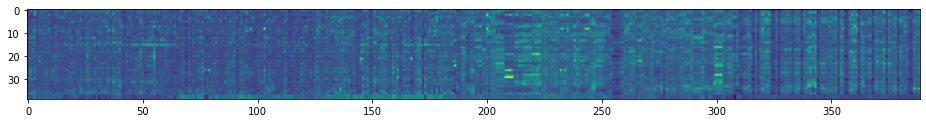

In [4]:
plt.figure(figsize=(16, 9))
plt.imshow(x.t())
plt.show()

In [5]:
import os

os.makedirs('data/spatial_uzh_processed/a/', exist_ok=True)


def plt_show(plt, filename):
    f = os.path.join('data/spatial_uzh_processed/a', filename)
    print('saving figure in', f)
    plt.savefig(f)
    plt.show()


389
[244  75 236  98 248  54]
torch.Size([389, 39])
(796, 731)
torch.Size([389, 39])
(532, 511)
torch.Size([389, 39])
(728, 755)
torch.Size([389, 39])
(450, 548)
torch.Size([389, 39])
(825, 859)
torch.Size([389, 39])
(506, 528)
389
[244  75 236  98 248  54]
torch.Size([389, 39])
(796, 731)
torch.Size([389, 39])
(532, 511)
torch.Size([389, 39])
(728, 755)
torch.Size([389, 39])
(450, 548)
torch.Size([389, 39])
(825, 859)
torch.Size([389, 39])
(506, 528)
389
[244  75 236  98 248  54]
torch.Size([389, 39])
(796, 731)
torch.Size([389, 39])
(532, 511)
torch.Size([389, 39])
(728, 755)
torch.Size([389, 39])
(450, 548)
torch.Size([389, 39])
(825, 859)
torch.Size([389, 39])
(506, 528)


<ipython-input-6-4b272885522d>:41: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 1152x648 with 0 Axes>

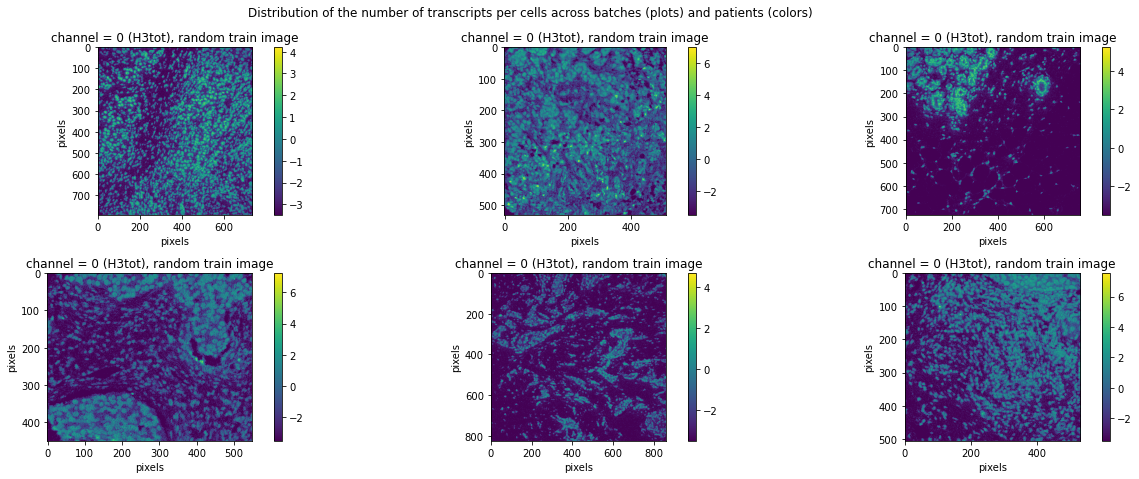

<Figure size 1152x648 with 0 Axes>

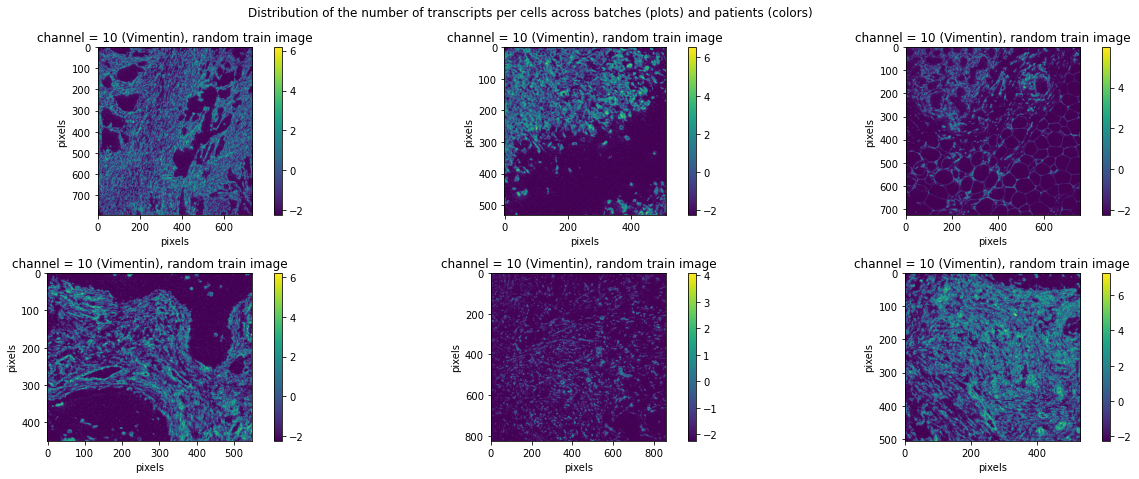

<Figure size 1152x648 with 0 Axes>

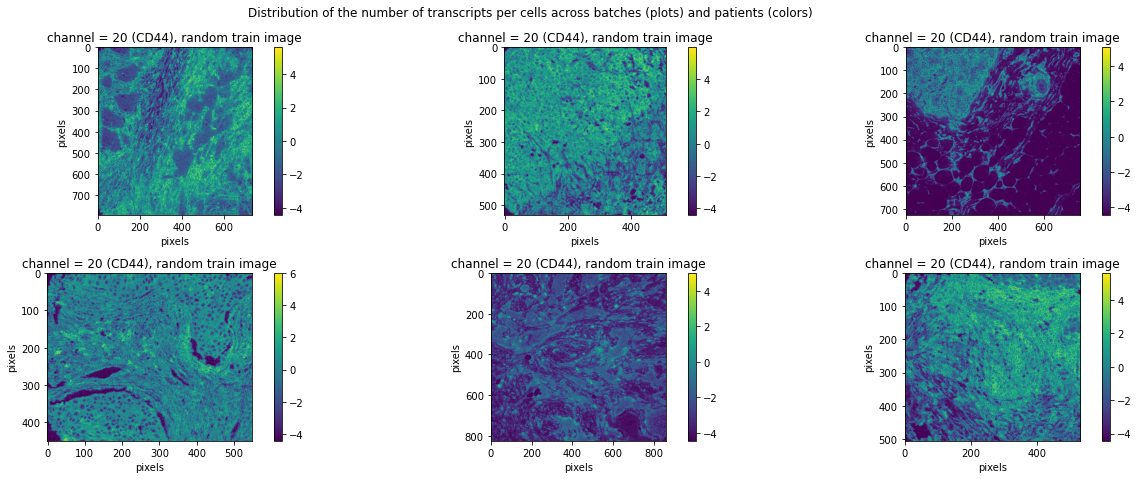

In [6]:
def a(split, channel):
    plt.figure(figsize=(16, 9))
    cols = 3
    rows = 2
    d_cols = 6
    d_rows = 6 * 9 / 16
    n = cols * rows

    plots = []

    fig = plt.figure(figsize=(cols * d_cols, rows * d_rows), dpi=72)
    k = 1
    from data import OmeDataset
    ds = OmeDataset(split)
    n = min(len(ds) - 1, n)
    np.random.seed(100)
    r = np.random.choice(len(ds) - 1, n, replace=False)
    print(len(ds))
    print(r)
    from data import CHANNEL_NAMES
    for k in range(n):
        ax = plt.subplot(rows, cols, k + 1)
        ome_index = r[k - 1]
        ome = ds[ome_index][:, :, channel].numpy()
        ome = np.log(ome + 1)
        mu, std, _ = get_mu_std(split)
        old_shape = ome.shape
        # ome = ome.ravel()
        ome = (ome - mu.numpy()[channel]) / std.numpy()[channel]
        # ome = ome.reshape(old_shape)
        print(ome.shape)
        plt.imshow(ome)
        ax.set_xlabel('pixels')
        ax.set_ylabel('pixels')
        plt.colorbar(ax=ax)
        name = CHANNEL_NAMES[channel]
        ax.set_title(f'channel = {channel} ({name}), random {split} image')

    fig.suptitle('Distribution of the number of transcripts per cells across batches (plots) and patients (colors)')
    plt.tight_layout()
    fig.show()

a('train', 0)
a('train', 10)
a('train', 20)